# Data Balancing

Supose you are working in a bank and 3% of your transactions are fraud. Your machine learning model has 95% accuracy. Is this a good model?
- Transactions = 10000
- Good transactions = 9700
- Fraud transactions = 300

What if we classify all transactions as not Fraud?

$Accuracy = \frac{TP + TN}{TP+FP+TN+FN} = \frac{0+9700}{0+0+9700+300} = 0.97$

Using unbalanced data in your classifier can lead to a tendency to classify towards the majority class. Simply because it does't have enough data to to learn the minority class.

This is the reason why it's important to balance the dataset Alimentar dados desequilibrados ao seu classificador pode torná-lo tendencioso em favor da classe majoritária, simplesmente porque ele não tem dados suficientes para aprender sobre a minoria.

There are two ways to do this. They are:
- Undersampling
- Oversampling

## Undersampling x Oversampling

1. Undersampling: lower the sample on the majority class.

2. Upsampling: increase the amount of samples on the minority class.

![Title](images/resampling.png)

*Note*: Balance should be done in the trainning dataset only.

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Read dataset
df = pd.read_csv("../data/bank-full.csv")

# Train and Test Split
y = df['Target'].copy()
X = df.drop('Target', axis=1).copy()
X = df.select_dtypes(include='number').copy()

# particionar dados
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.99, random_state=42) 

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


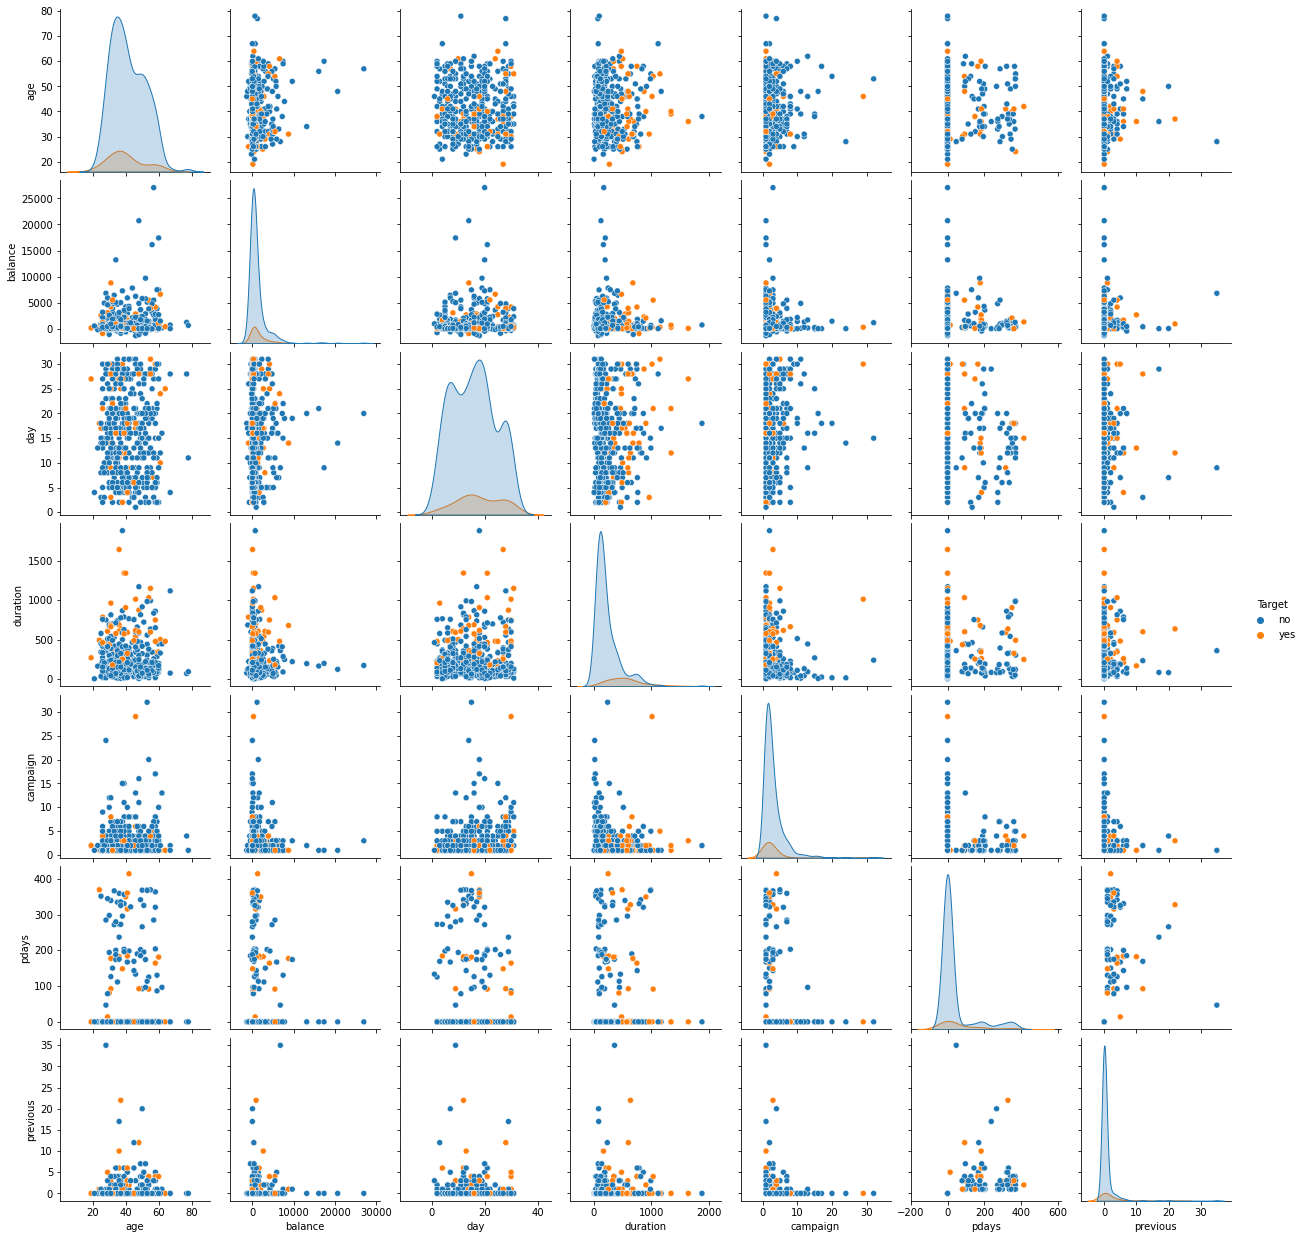

In [15]:
# Visualize the dataset distribution
sns.pairplot(data=pd.concat([X_train, y_train], axis=1), hue="Target");

## [Oversampling](https://imbalanced-learn.org/stable/over_sampling.html)

- __[RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler)__
One way of tackling this problem is creating new samples on the underrepresented class. One simple, bit ineffective way is to make make new aleatory samples with sample reposition.

<img src="images/comparison_over_sampling_002.png" width="500px"/>

With duplicate samples, our new samples areon top of new samples.

In [16]:
# Import samples
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))
sm = RandomOverSampler(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'no': 399, 'yes': 53})
Original dataset shape Counter({'no': 399, 'yes': 399})


In [17]:
pd.DataFrame(X_res).duplicated().sum()

346

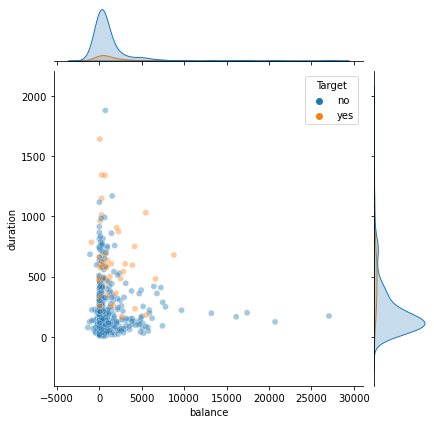

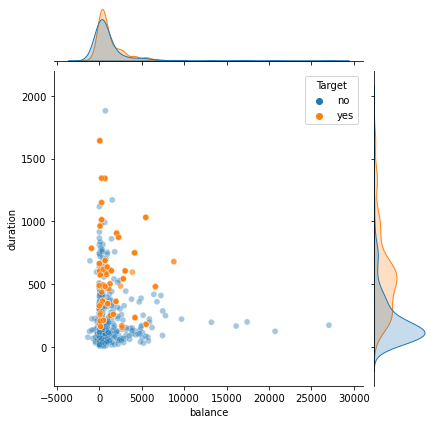

In [18]:
sns.jointplot(data=X_train, x='balance', y='duration', hue=y_train, alpha=0.4)
sns.jointplot(data=X_res, x='balance', y='duration', hue=y_res, alpha=0.4)

In [19]:
X_res.head()

,age,balance,day,duration,campaign,pdays,previous
0,41,59,15,75,8,-1,0
1,41,0,16,330,4,-1,0
2,43,46,27,63,8,-1,0
3,48,2263,29,874,2,-1,0
4,30,1286,28,44,12,-1,0


If duplicating data is a problem, we can use the parameter `shrinkage` to control the dispersion in the new samples.

<img src="images/comparison_over_sampling_003.png" width="500px"/>

In [20]:
# !pip install pandas numpy sklearn matplotlib imbalanced-learn==0.9.0 seaborn

In [21]:
!pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.9.1
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: /home/tulio/anaconda3/lib/python3.9/site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: imblearn


Original dataset shape Counter({'no': 399, 'yes': 53})
Original dataset shape Counter({'no': 399, 'yes': 399})


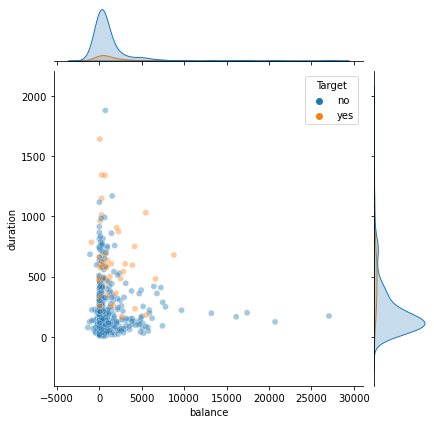

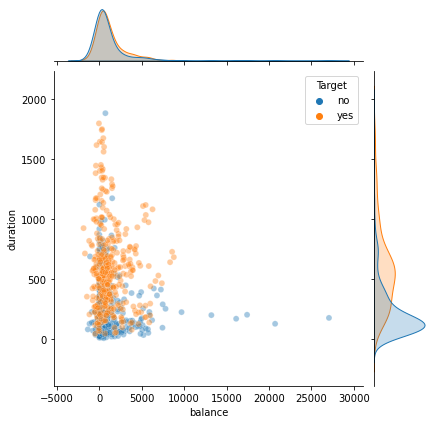

In [22]:
print('Original dataset shape %s' % Counter(y_train))
sm = RandomOverSampler(random_state=42, shrinkage=0.5)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_res))

sns.jointplot(data=X_train, x='balance', y='duration', hue=y_train, alpha=0.4)
sns.jointplot(data=X_res, x='balance', y='duration', hue=y_res, alpha=0.4);

- [SMOTE (Synthetic Minority Oversampling Technique)](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

While `RandomOverSampler` is oversampled duplicating some of the samples in the minority class. `SMOTE` and `ADASYN`  use interpolation to create new samples. However, the interpolation method differs between them.

`SMOTE`  doesn't make any distinction between samples that are easy of dificult to classify and uses the rule of nearest neighbours to interpolate new samples.

The main idea of **SMOTE** is the creation of sintetic data between each sample in the **minority class e its "k" closest neighbours**. This means that for every sample in the minority class, its "k" closest neightbours (standard k=5). Then a line is drawn between these pints and a new random point is selected.

<img src="https://miro.medium.com/max/875/1*CG712DHQL_ZMS3gAEGd_5w.jpeg" text="https://towardsdatascience.com/smote-synthetic-data-augmentation-for-tabular-data-1ce28090debc">

In the image, SMOTE is applied in $x1$ with 3 closest neighbours ($x2$, $x3$ and $x4$) to create sintetic data $s1$, $s2$, and $s3$.

**SMOTE** has some contraints worth mentioning:
- **SMOTE only works with continuous data**
- **The synthetic data created are linear depent**, resulting in BIASED data and consequently, tend to overfit.
- **SMOTE** can't pe performed before **outlier** processing.

Original dataset shape Counter({'no': 399, 'yes': 53})
Original dataset shape Counter({'no': 399, 'yes': 399})


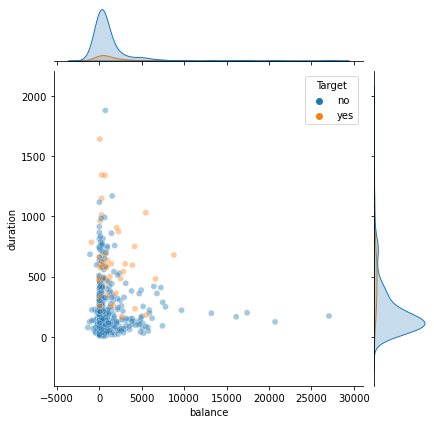

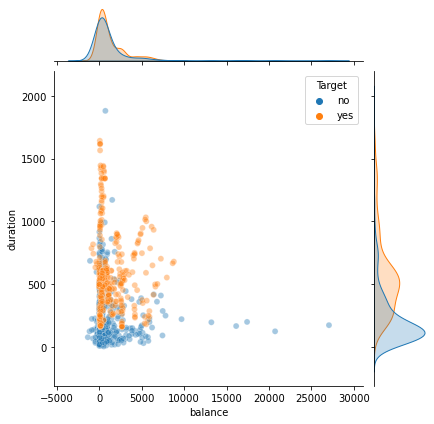

In [23]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_res))

sns.jointplot(data=X_train, x='balance', y='duration', hue=y_train, alpha=0.4)
sns.jointplot(data=X_res, x='balance', y='duration', hue=y_res, alpha=0.4);

- [ADASYN (Adaptive Synthetic)](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html#imblearn.over_sampling.ADASYN)

O `ADASYN` focus in generating samples close to the original data that are missclassified in a k-Nearest Neighbors classifier.

ADASYN is a technique based on SMOTE for synthetic data. The difference between ADASYN and SMOTE is that ADASYN detects those samples in the minority class in areas dominated by the majoriity class. This means that ADASYN focuses on the samples in the minority class that are difficult to to classify because it is in a low desity area.

<img src=https://miro.medium.com/max/875/1*iXHQaRrdIJLRsxxjEnr67Q.jpeg text="https://towardsdatascience.com/smote-synthetic-data-augmentation-for-tabular-data-1ce28090debc">

With ADASYN, a distribution density is considered to decide the number of synthetic data created for a sample, while with SMOTE, theres a standard weight for every minority class sample.

Original dataset shape Counter({'no': 399, 'yes': 53})
Original dataset shape Counter({'yes': 406, 'no': 399})


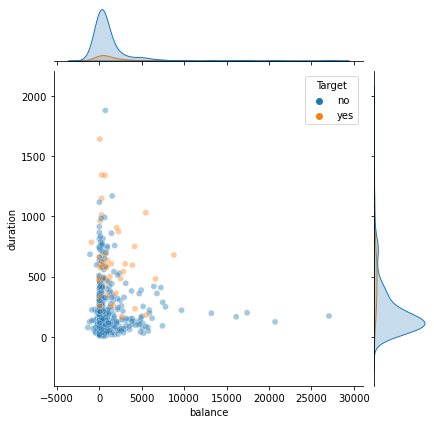

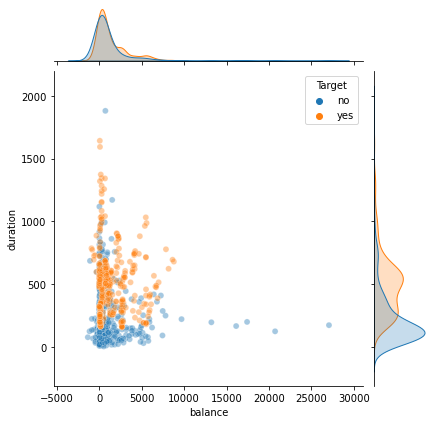

In [24]:
from imblearn.over_sampling import ADASYN 
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))
sm = ADASYN(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_res))

sns.jointplot(data=X_train, x='balance', y='duration', hue=y_train, alpha=0.4)
sns.jointplot(data=X_res, x='balance', y='duration', hue=y_res, alpha=0.4)

Neither SMOTE or ADASYN accept a numeric and cathegoric variables simultaneously. For mixed data it's possible to use [SMOTENC](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC). And for categorical data it's possible to use [SMOTEN](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTEN.html#imblearn.over_sampling.SMOTEN) <br>

#### SMOTE x ADASYN

<img src=https://imbalanced-learn.org/stable/_images/sphx_glr_plot_comparison_over_sampling_006.png width=600>

## [Undersampling](https://imbalanced-learn.org/stable/under_sampling.html)

- [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

Original dataset shape Counter({'no': 399, 'yes': 53})
Original dataset shape Counter({'no': 53, 'yes': 53})


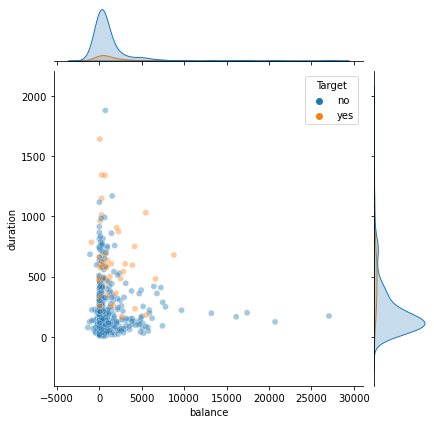

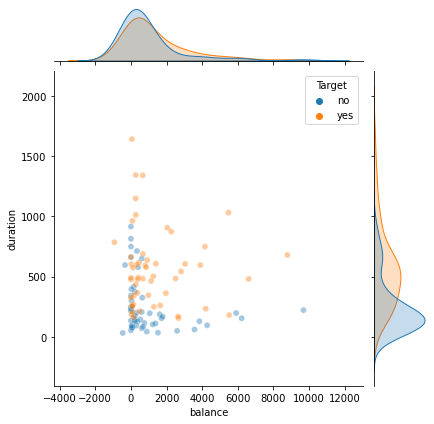

In [25]:
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))
sm = RandomUnderSampler(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_res))

sns.jointplot(data=X_train, x='balance', y='duration', hue=y_train, alpha=0.4)
sns.jointplot(data=X_res, x='balance', y='duration', hue=y_res, alpha=0.4)

- [EditedNearestNeighbours](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.EditedNearestNeighbours.html)

Applies an KNN algorithm and edits the dataset removing samples that do not correspont with it's neighbors.

<img src="images/ENN.png" width=500 text="https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.590.5284&rep=rep1&type=pdf">

Original dataset shape Counter({'no': 399, 'yes': 53})
Original dataset shape Counter({'no': 320, 'yes': 53})


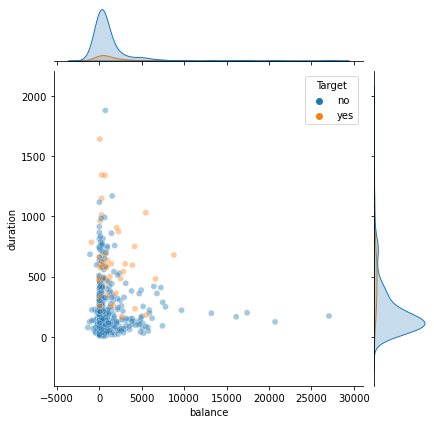

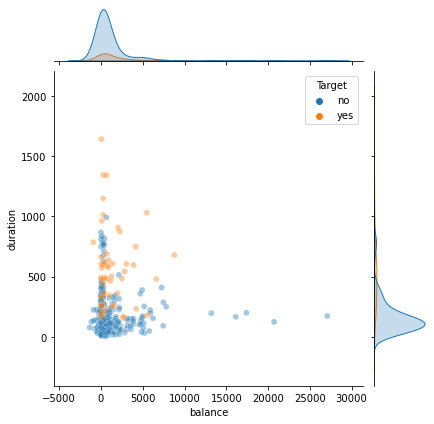

In [26]:
from imblearn.under_sampling import EditedNearestNeighbours 
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))
sm = EditedNearestNeighbours()
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_res))

sns.jointplot(data=X_train, x='balance', y='duration', hue=y_train, alpha=0.4)
sns.jointplot(data=X_res, x='balance', y='duration', hue=y_res, alpha=0.4)

> It's almost never a good practice to exclude data that could be used for generating insight and values.

## Up + Downsampling

First it's made an oversampling with SMOTE followed by an `Edited Nearest-Neighbors`.

- [SMOTEENN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)

<img src="images/SMOTEENN.png" width=500>

After SMOTEEN implementation, the separation between classes is much more evident, and the the dataset is balanced.

Original dataset shape Counter({'no': 399, 'yes': 53})
Original dataset shape Counter({'yes': 297, 'no': 279})


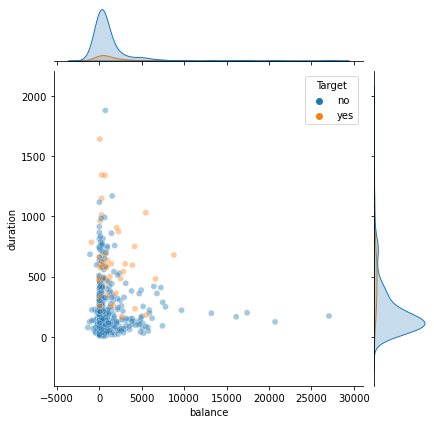

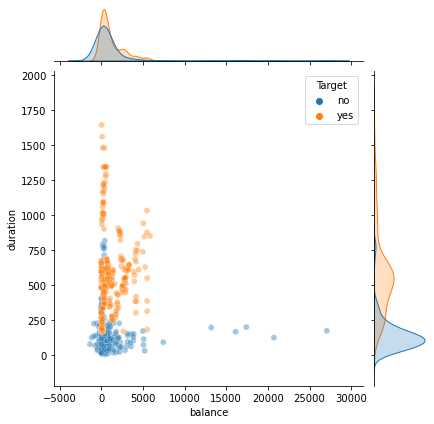

In [27]:
from imblearn.combine import SMOTEENN 
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_res))

sns.jointplot(data=X_train, x='balance', y='duration', hue=y_train, alpha=0.4)
sns.jointplot(data=X_res, x='balance', y='duration', hue=y_res, alpha=0.4)

## Class Weight

The last and **most recomended** technique is to apply an algorythm that penalizes classification errors in the minority class and increases the weight in these errors

During this trainning process, the `class_weight='balanced'` is used to penalize classification errors in the minority class prortional to it's underrepresentation.

## ## Bibliography and articles

Special thanks to [Patricia](https://www.linkedin.com/in/patr%C3%ADcia-bongiovanni-catandi-13650ba1/) and [Kuma](https://www.linkedin.com/in/thiagokuma/) for the machine learning instruction at Let's Code.

- [Common pitfalls and recommended practices](https://imbalanced-learn.org/stable/common_pitfalls.html)
- [classification_report_imbalanced](https://imbalanced-learn.org/stable/references/generated/imblearn.metrics.classification_report_imbalanced.html)
- [SMOTE, ADASYN](https://towardsdatascience.com/class-imbalance-smote-borderline-smote-adasyn-6e36c78d804)
- [Why we have leakage in CV](https://medium.com/lumiata/cross-validation-for-imbalanced-datasets-9d203ba47e8)
- [Classifier including inner balancing samplers](https://imbalanced-learn.org/stable/ensemble.html)
- https://erasmo-aln.medium.com/oversampling-ou-undersampling-porque-n%C3%A3o-os-dois-juntos-124ecb7fbb6b


#### How to use these balancing techniques with cross-validation?

## Exercício

Escolha pelo menos duas técnicas de tratamento de classes desbalanceadas e aplique no dataset "data/bank-full.csv" e compare a performance do modelo.